# 🎧 Spotify User Segmentation & Premium Prediction

## 📊 Section Titles

- [`## 1. 📦 Import All Requirements`](#1--import-all-requirements)

- [`## 2. 🗃️ Get & Read the Dataset`](#2-️-get-and-read-the-dataset)

- [`## 3. 📝 Basic Overview`](#3--basic-overview)

- [`## 4. 🚫 Missing Values`](#4--missing-values)

- [`## 5. 💡 Explore Interesting Data Insights`](#5--explore-interesting-data-insights)

- [`## 6. 📊 Show Key Distributions`](#6--show-key-distributions)

- [`## 7. 🔗 Find Correlations`](#7--find-correlations)

- [`## 8. 🔎 Spotting Outliers`](#8--spotting-outliers)

- [`## 9. 🧩 User Segmentation Using K-Means`](#9--user-segmentation-using-k-means)

- [`## 10. 🤖 Using ML to Predict User Subscribtion Willingness`](#10--using-ml-to-predict-user-subscribtion-willingness)

## 1. 📦 Import All Requirements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

## 2. 🗃️ Get and Read the Dataset

In [3]:
data = pd.read_excel('../data/spotify_data.xlsx')

print(data.shape)
data.head(8)

(520, 20)


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
5,20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,NaN,NaN,NaN,NaN,Ok
6,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,NaN,NaN,NaN,NaN,Ok
7,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Conversational,Both,Longer,Satisfied


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

## 3. 📝 Basic Overview

In [5]:
# Basic overview
data.describe(include='all')

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
count,520,520,520,520,520,520,312,520,520,520,520,520,520,520.000000,520,372,380,379,391,520
unique,5,3,4,15,2,2,4,2,11,3,15,35,20,NaN,5,19,4,3,3,5
top,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Individual Plan- Rs 119/ month,Music,Melody,Night,Relaxation and stress relief,While Traveling,recommendations,NaN,Rarely,Comedy,Story telling,Both,Shorter,Ok
freq,422,391,169,300,424,334,95,410,259,312,195,111,113,NaN,201,107,152,180,191,280
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.503846,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.979552,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 4. 🚫 Missing Values

In [6]:
# Check for missing values
data.isnull().sum().sort_values(ascending=False)

preffered_premium_plan         208
fav_pod_genre                  148
pod_host_preference            141
preffered_pod_format           140
preffered_pod_duration         129
spotify_usage_period             0
Gender                           0
Age                              0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preferred_listening_content      0
music_lis_frequency              0
music_Influencial_mood           0
music_time_slot                  0
fav_music_genre                  0
pod_lis_frequency                0
music_recc_rating                0
music_expl_method                0
pod_variety_satisfaction         0
dtype: int64

## 5. 💡 Explore Interesting Data Insights

### How many people are using the Free vs Premium plan?

Count:
 spotify_subscription_plan
Free (ad-supported)            424
Premium (paid subscription)     96
Name: count, dtype: int64


Percentage:
 spotify_subscription_plan
Free (ad-supported)            81.54%
Premium (paid subscription)    18.46%
Name: proportion, dtype: object


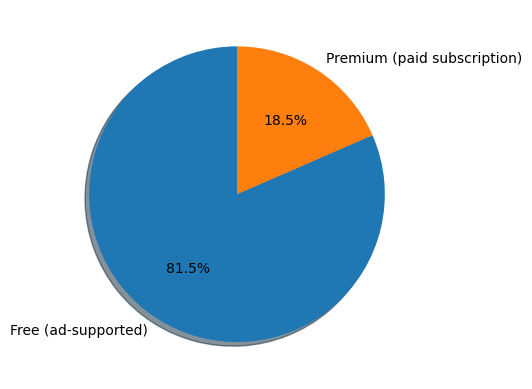

In [7]:
# Number people
print('Count:\n', data['spotify_subscription_plan'].value_counts())

print('\n')

# Percentage
print('Percentage:\n', data['spotify_subscription_plan'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

data['spotify_subscription_plan'].value_counts().plot(
    kind='pie',
    ylabel='',
    autopct='%1.1f%%',
    shadow=True,
    legend=False,
    startangle=90
)
plt.show()

### All age groups analysis

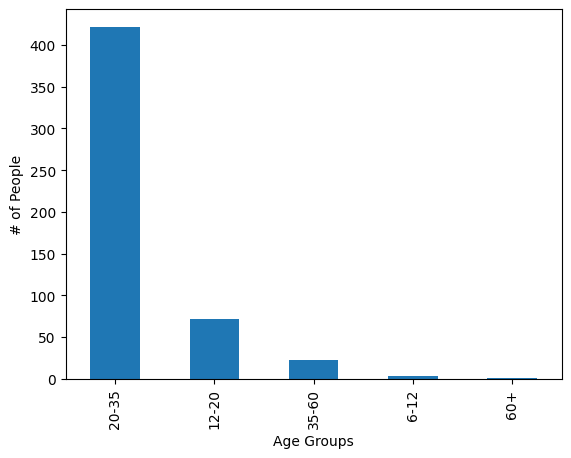

In [8]:
data['Age'].value_counts().plot(
    kind='bar',
    legend=False,
    ylabel='# of People',
    xlabel='Age Groups'
)
plt.show()

### The most liked music genre for each age group

In [9]:
data.groupby('Age')['fav_music_genre'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Age    fav_music_genre          
12-20  classical                     33.8%
       Rap                          26.76%
       Melody                       23.94%
       Pop                          14.08%
       All                           1.41%
20-35  Melody                       54.74%
       Pop                          17.06%
       classical                    13.27%
       Rap                           7.58%
       Electronic/Dance              3.55%
       All                           1.18%
       Kpop                          0.95%
       Rock                          0.95%
       Classical & melody, dance     0.47%
       trending songs random         0.24%
35-60  Melody                       43.48%
       classical                    21.74%
       Pop                          13.04%
       Rap                          13.04%
       Electronic/Dance              4.35%
       Old songs                     4.35%
6-12   classical                    66.67%
       Rap           

### Which age group is most willing to upgrade to Premium?

In [10]:
willing_users = data[data['premium_sub_willingness'] == 'Yes']

print(f'Shape: {willing_users.shape}')
willing_users.head()

Shape: (186, 20)


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
8,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","Playlists, Radio",4,Rarely,Comedy,Story telling,Well known individuals,Shorter,Satisfied
14,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),Yes,NaN,Music,Pop,Morning,Relaxation and stress relief,Office hours,"recommendations, Playlists",5,Rarely,Lifestyle and Health,Educational,Well known individuals,Shorter,Very Satisfied


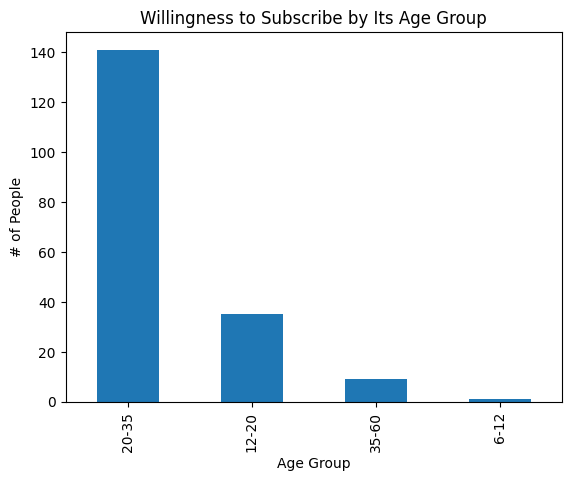

In [11]:
willing_users['Age'].value_counts().plot(
    kind='bar',
    legend=False,
    xlabel='Age Group',
    ylabel='# of People',
    title='Willingness to Subscribe by Its Age Group',
)
plt.show()

In [12]:
(willing_users['Age'].value_counts() / data['Age'].value_counts()).fillna(0).mul(100).round(2).astype(str) + '%'

Age
12-20     49.3%
20-35    33.41%
35-60    39.13%
6-12     33.33%
60+        0.0%
Name: count, dtype: object

### The most preffered Premium plan for willing users

In [13]:
plan_counts = willing_users['preffered_premium_plan'].value_counts()

plan_counts

preffered_premium_plan
Individual Plan- Rs 119/ month    69
Duo plan- Rs 149/month            52
Student Plan-Rs 59/month          34
Family Plan-Rs 179/month          26
Name: count, dtype: int64

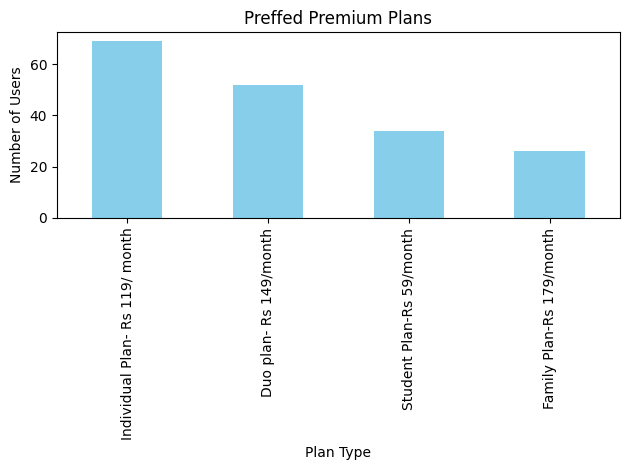

In [14]:
plan_counts.plot(kind='bar', color='skyblue', title='Preffed Premium Plans')
plt.xlabel('Plan Type')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

## 6. 📊 Show Key Distributions

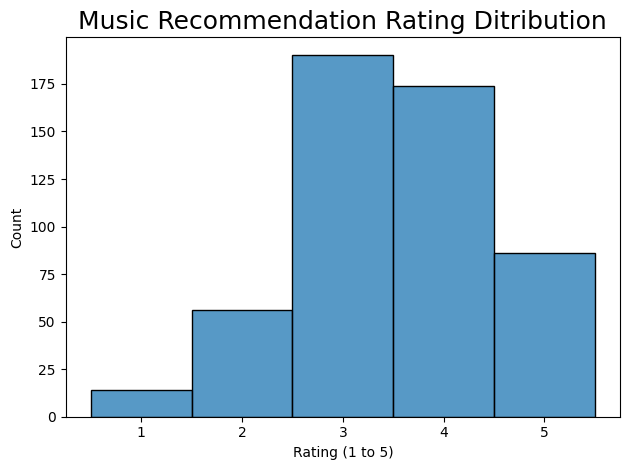

In [15]:
# Music recommendation system rating
sns.histplot(data['music_recc_rating'], bins=5, discrete=True)
plt.title('Music Recommendation Rating Ditribution', fontsize=18)
plt.xlabel('Rating (1 to 5)')
plt.tight_layout()
plt.show()

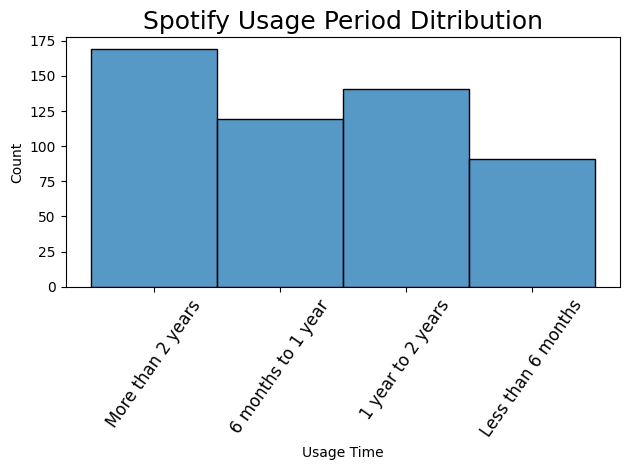

In [16]:
# Usage time distribution
sns.histplot(data['spotify_usage_period'], bins=4, discrete=True)
plt.title('Spotify Usage Period Ditribution', fontsize=18)
plt.xticks(rotation=55, fontsize=12)
plt.xlabel('Usage Time')
plt.tight_layout()
plt.show()

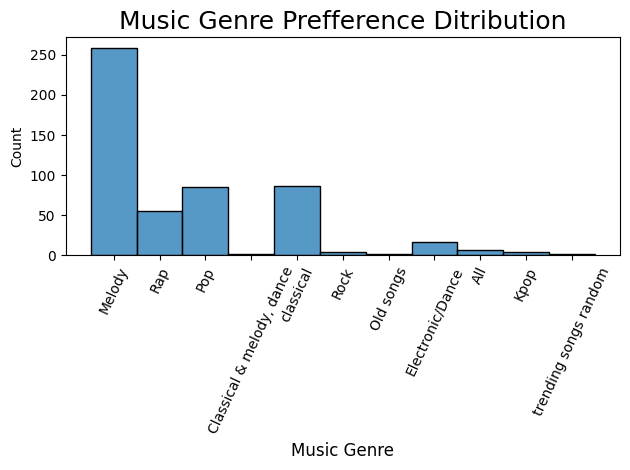

In [17]:
# Favorite music distribution
sns.histplot(data['fav_music_genre'], bins=11, discrete=True)
plt.title('Music Genre Prefference Ditribution', fontsize=18)
plt.xticks(rotation=65)
plt.xlabel('Music Genre', fontsize=12)
plt.tight_layout()
plt.show()

## 7. 🔗 Find Correlations

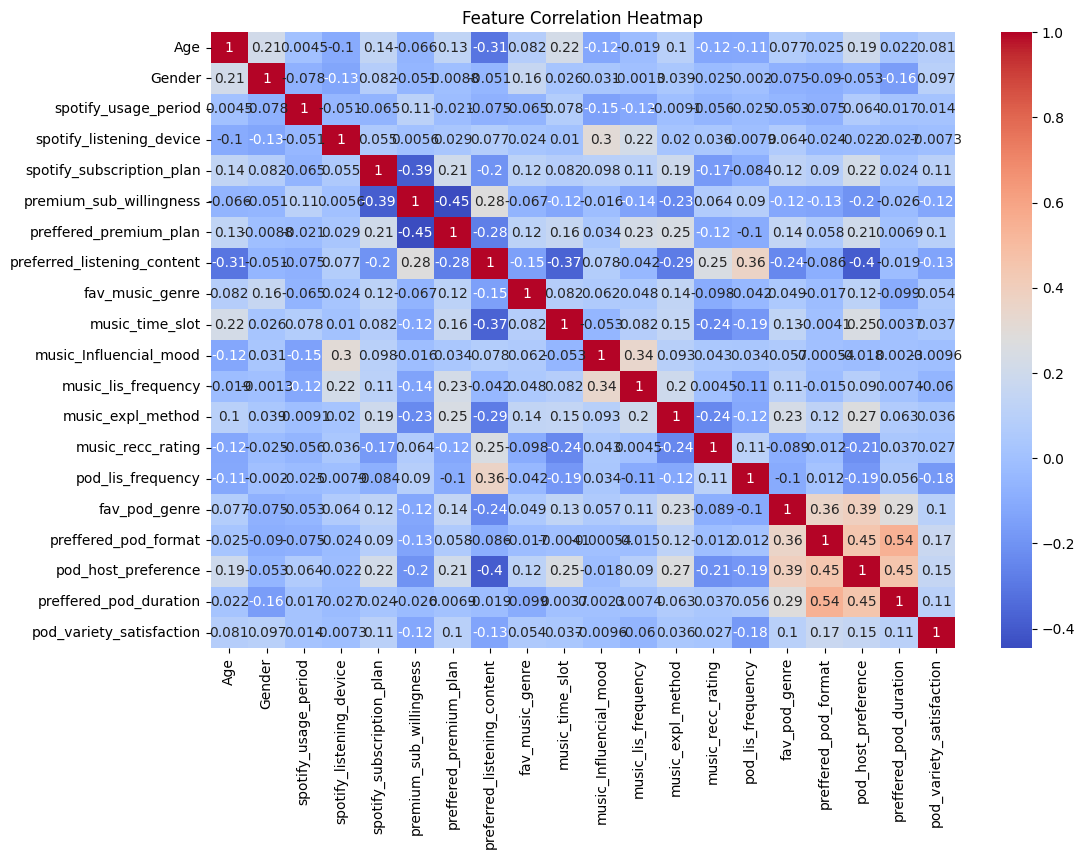

In [18]:
# Encode all object types numerically for correlations
df_encoded = data.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 8. 🔎 Spotting Outliers

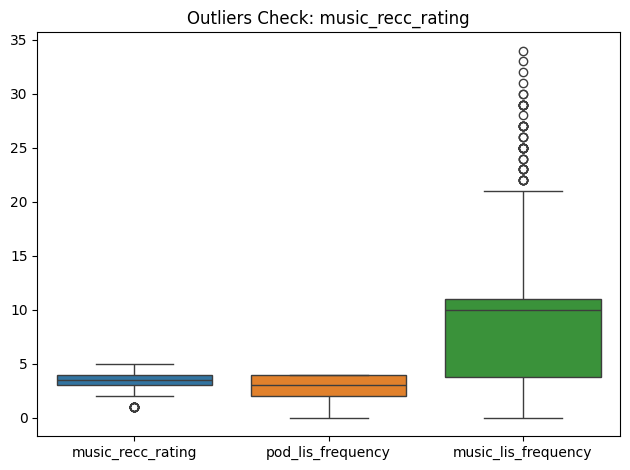

In [19]:
# Visualize outliers in numeric feature
sns.boxplot(data=df_encoded[['music_recc_rating', 'pod_lis_frequency', 'music_lis_frequency']])
plt.title('Outliers Check: music_recc_rating')
plt.tight_layout()
plt.show()

In [20]:
# Clean music_lis_frequency from poor text data by making multiple columns from multi-choice text
listening_types = ['Office', 'Workout', 'Night', 'Travel', 'Leisure']

for t in listening_types:
    data[f'listens_{t.lower()}'] = data['music_lis_frequency'].str.contains(t, case=False)

data.iloc[:, -5:]

,listens_office,listens_workout,listens_night,listens_travel,listens_leisure
0,False,False,False,False,True
1,False,True,False,False,False
2,False,False,False,True,False
3,True,True,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
515,False,False,False,True,False
516,False,True,False,True,True
517,False,False,False,False,True
518,False,True,False,False,True


## 9. 🧩 User Segmentation Using K-Means

### Select features

In [21]:
# Select specific features
cluster_features = [
    'music_recc_rating',
    'fav_music_genre',
    'music_time_slot',
    'music_lis_frequency',
    'pod_lis_frequency',
    'preferred_listening_content'
]

df_seg = data.copy()

# Encode all string values in numerical representations
for col in cluster_features:
    if df_seg[col].dtype == 'object':
        df_seg[col] = LabelEncoder().fit_transform(df_seg[col].astype(str))

df_seg[cluster_features]

,music_recc_rating,fav_music_genre,music_time_slot,music_lis_frequency,pod_lis_frequency,preferred_listening_content
0,3,4,2,34,0,1
1,2,7,0,32,4,1
2,4,6,2,19,2,1
3,4,4,2,13,1,0
4,4,4,2,34,3,0
...,...,...,...,...,...,...
515,5,6,1,26,3,0
516,2,6,2,29,3,0
517,3,6,2,34,1,0
518,2,4,2,33,4,0


### Init and run K-Means

In [22]:
# Run K-Means clustering
X_seg = df_seg[cluster_features]
kmeans = KMeans(n_clusters=4, random_state=42)
df_seg['segment'] = kmeans.fit_predict(X_seg)

# Analyze segments
segment_summary = df_seg.groupby('segment')[cluster_features].mean()
segment_summary

,music_recc_rating,fav_music_genre,music_time_slot,music_lis_frequency,pod_lis_frequency,preferred_listening_content
segment,,,,,,
0,3.518219,5.028340,1.550607,31.761134,2.251012,0.149798
1,3.814815,5.203704,1.425926,10.092593,2.259259,0.092593
2,3.400000,5.028571,1.400000,1.400000,2.657143,0.200000
3,3.413043,6.021739,1.119565,24.217391,2.478261,0.331522


### Plot the results using t-SNE

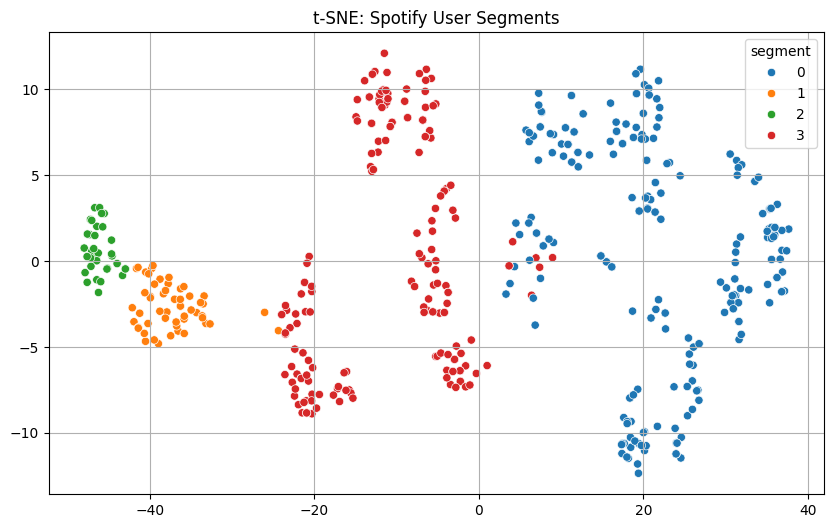

In [23]:
# Visualize segments using t-SNE
X_vis = df_seg[cluster_features]

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_vis)

# Add to dataframe
df_seg['tsne_x'] = X_embedded[:, 0]
df_seg['tsne_y'] = X_embedded[:, 1]

# Plot it
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_seg, x='tsne_x', y='tsne_y', hue='segment', palette='tab10')
plt.title("t-SNE: Spotify User Segments")
plt.xlabel("")
plt.ylabel("")
plt.grid(True)
plt.show()


We can see that we have 4 strongly separated clusters of users, who have their own specific traits.

We can see that segment 1 and 2 are very close to each other, which means they're really similar; however, they also have something not in common, which is enough for them to be separated. In addition, they have low variance, which indicates fixed and straightforward choices. Importantly, it tells us they have almost the same rating of recommendation system, time spent on Spotify, favorite genres, etc.

Segment 0 is the farthest from 1 and 2, which tells us that these groups are almost the opposite when it comes to time spent on Spotify and other features. It also has the largest variance out of all segments, which indicates a wide variety of users in this segment. It is pretty hard to make any decisions from this point because the variance is really big. Maybe we will be able to increase the `n_clusters` in `KMeans` in order to get more clusters and maybe separate that giant segment into something more meaningful and insightful.

Segment 3 is a liminal segment that acts as a transitional segment between the two segments on the left and the biggest one on the right. We can notice that some of this segment slightly translates into segment 0.

## 10. 🤖 Using ML models to Predict User Subscribtion Willingness

### Prepare the dataset

In [24]:
# Prepare certain features for ML model
features = [
    'Age',
    'Gender',
    'fav_music_genre',
    'music_time_slot',
    'spotify_subscription_plan'
]

In [25]:
# Encode categorical features for ML model
df_ml = data.copy()
for col in features:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

df_ml[features].head()

,Age,Gender,fav_music_genre,music_time_slot,spotify_subscription_plan
0,1,0,4,2,0
1,0,1,7,0,0
2,2,2,6,2,0
3,1,0,4,2,0
4,1,0,4,2,0


In [26]:
# Get features and target variable
X = df_ml[features]
y = data['premium_sub_willingness'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training data to handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Logistic Regression model

In [27]:
# Train and test the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_res, y_train_res)
predictions = lr_model.predict(X_test)

# Print classification report for Logistic Regression
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        63
           1       0.61      0.56      0.58        41

    accuracy                           0.68       104
   macro avg       0.67      0.66      0.66       104
weighted avg       0.68      0.68      0.68       104



In [28]:
features_weights = pd.DataFrame(lr_model.coef_[0], index=X.columns, columns=['Weight']).sort_values(by='Weight', ascending=False)
features_weights['Adjusted Weight'] = features_weights['Weight'] + lr_model.intercept_[0]
features_weights

,Weight,Adjusted Weight
spotify_subscription_plan,1.870033,1.654762
fav_music_genre,0.121726,-0.093545
Gender,-0.101238,-0.316509
music_time_slot,-0.324318,-0.539589
Age,-0.345011,-0.560282


It shows the importance of **each feature** in predicting user subscription willingness. **Positive weights** indicate a **positive correlation** with willingness to subscribe *(approaches to YES)*, while **negative weights** indicates a **negative correlation** *(approaches to NO)*.

So we can see that `spotify_subscription_plan` and `fav_music_genre` have the most significant impact on the **positive prediction** of user subscription willingness meaning that users who prefer certain music genres or subscription plans are **more likely to subscribe**, while `Age` has a negative impact, meaning that older users are **less likely to subscribe**.

### Decision Tree model

In [29]:
# Train and test the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train_res, y_train_res)
dt_predictions = dt_model.predict(X_test)

# Print classification report for Decision Tree
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        63
           1       0.64      0.34      0.44        41

    accuracy                           0.66       104
   macro avg       0.65      0.61      0.60       104
weighted avg       0.66      0.66      0.63       104



In [30]:
# Export the decision tree rules
tree_rules = export_text(dt_model, feature_names=list(X.columns))

print(tree_rules)

|--- spotify_subscription_plan <= 0.50
|   |--- fav_music_genre <= 6.50
|   |   |--- Age <= 0.50
|   |   |   |--- music_time_slot <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- music_time_slot >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  0.50
|   |   |   |--- fav_music_genre <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- fav_music_genre >  4.50
|   |   |   |   |--- class: 0
|   |--- fav_music_genre >  6.50
|   |   |--- music_time_slot <= 1.50
|   |   |   |--- Age <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  1.50
|   |   |   |   |--- class: 0
|   |   |--- music_time_slot >  1.50
|   |   |   |--- Gender <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Gender >  1.50
|   |   |   |   |--- class: 1
|--- spotify_subscription_plan >  0.50
|   |--- fav_music_genre <= 8.50
|   |   |--- Age <= 0.50
|   |   |   |--- fav_music_genre <= 5.00
|   |   |   |   |--- class: 0
|   |   |   |--- fav_music_genre >  5.00
|   |   |   |   |--- class: 1
|   | 

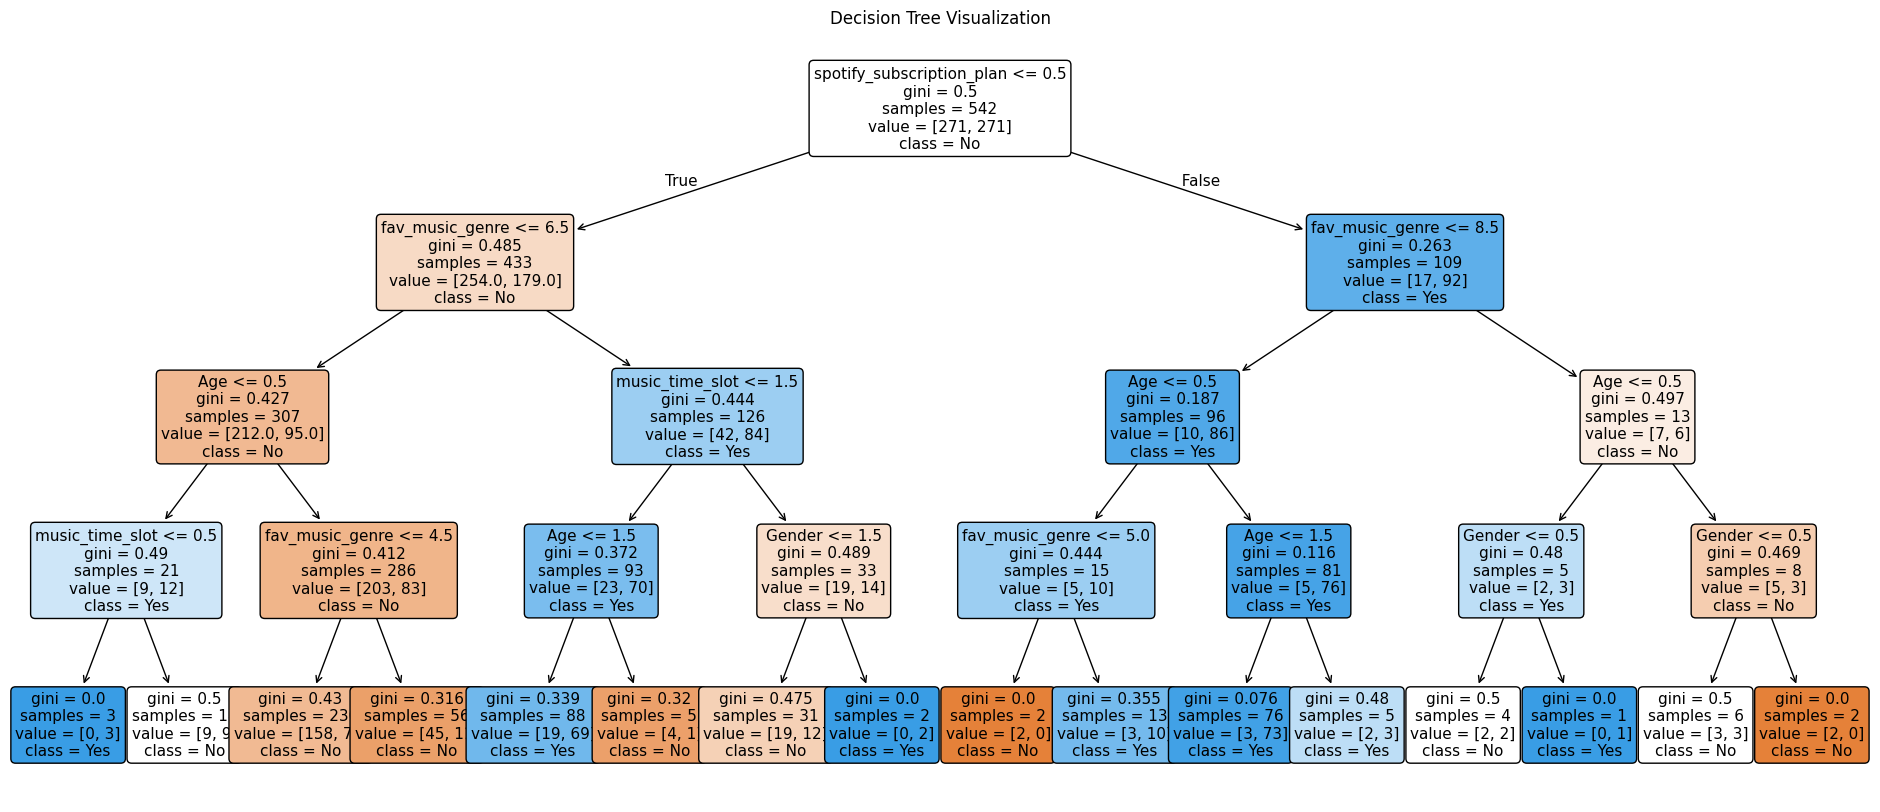

In [31]:
plt.figure(figsize=(24, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=11)
plt.title("Decision Tree Visualization")
plt.show()